# Assignment 2

4638472273
Suspected Home Cell Co-odinates [[-96.70839404  32.73299989]]


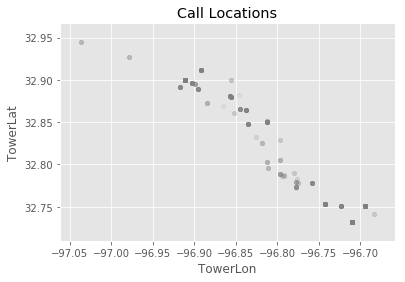

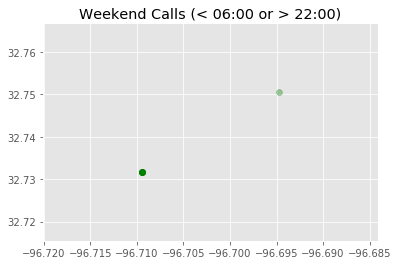

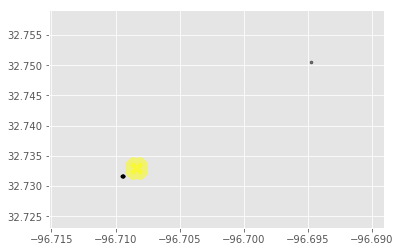

------------------------------------------------------------------------------------
phone number = 4638472273
Suspected Home Cell Co-odinates [[-96.70839404  32.73299989]]


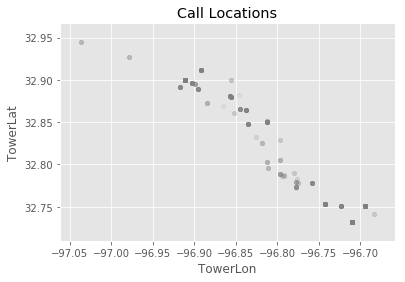

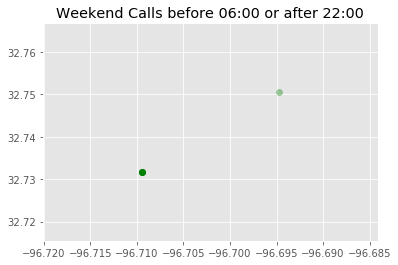

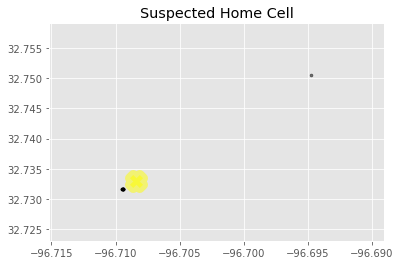

------------------------------------------------------------------------------------
phone number = 1559410755
Suspected Home Cell Co-odinates [[-96.92355165  32.87097035]]


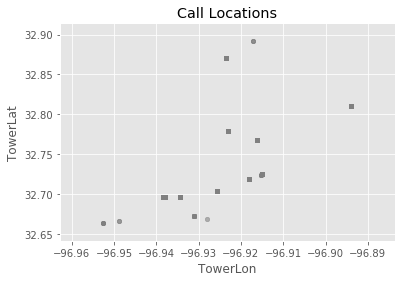

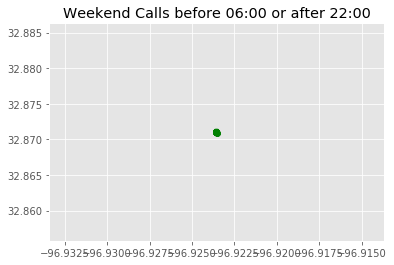

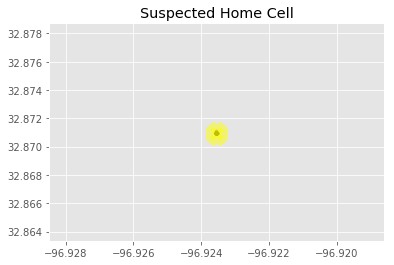

------------------------------------------------------------------------------------
phone number = 4931532174
Suspected Home Cell Co-odinates [[-96.86526087  32.86557287]]


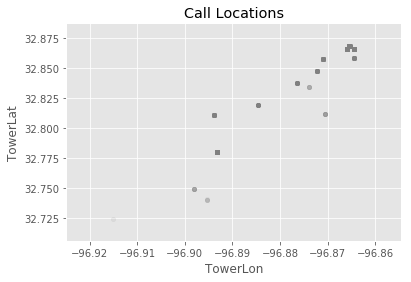

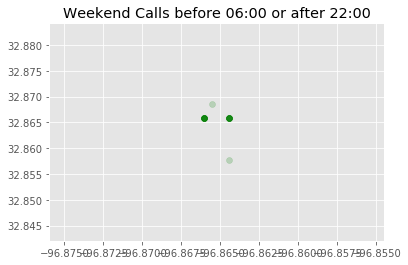

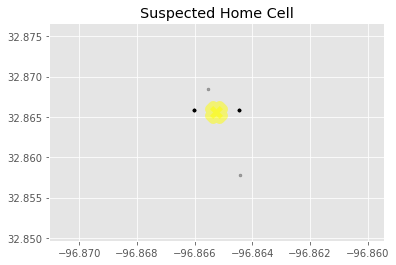

------------------------------------------------------------------------------------
phone number = 2419930464
Suspected Home Cell Co-odinates [[-96.83577361  32.84688271]]


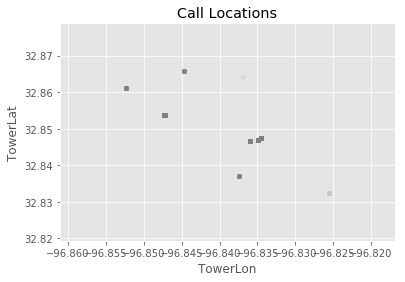

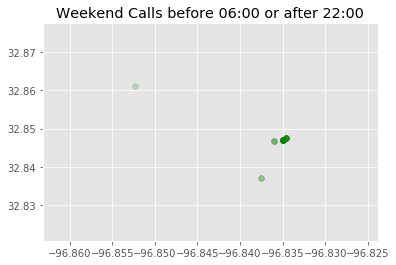

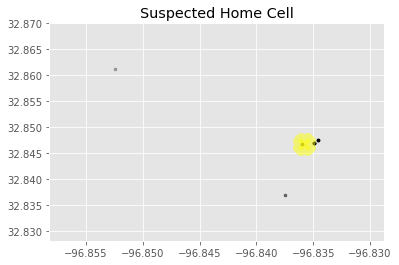

------------------------------------------------------------------------------------
phone number = 1884182865
Suspected Home Cell Co-odinates [[-96.73155696  32.87684057]]


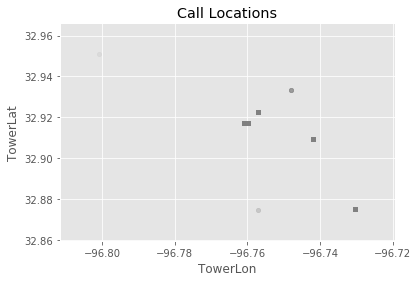

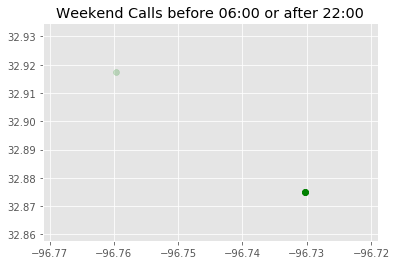

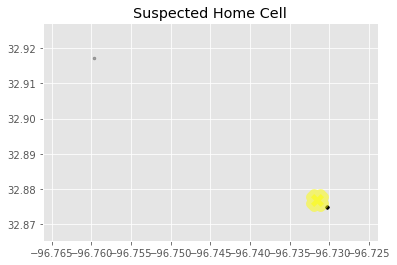

------------------------------------------------------------------------------------
phone number = 3688089071
Suspected Home Cell Co-odinates [[-96.685556  32.770833]]


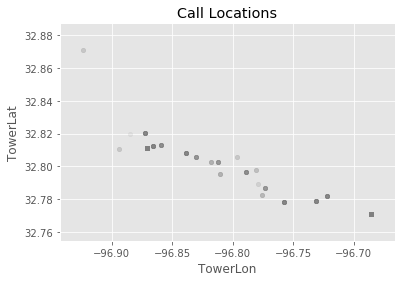

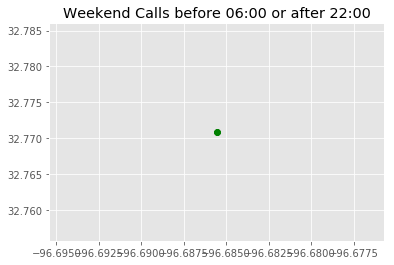

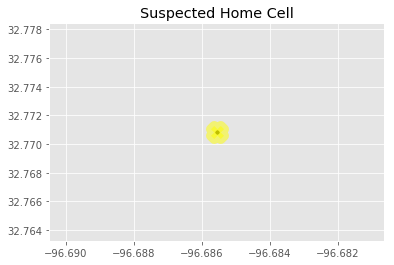

------------------------------------------------------------------------------------
phone number = 4555003213
Suspected Home Cell Co-odinates [[-96.84065775  32.70437017]]


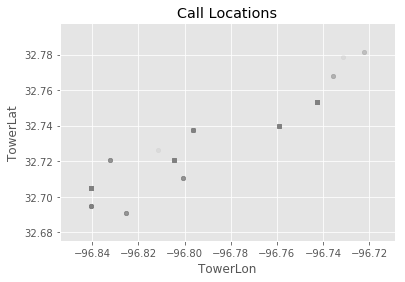

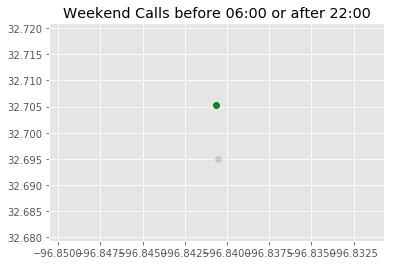

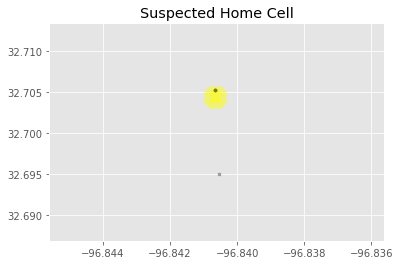

------------------------------------------------------------------------------------
phone number = 2068627935
Suspected Home Cell Co-odinates [[-96.604444  32.703056]]


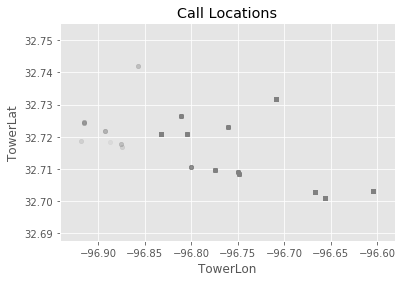

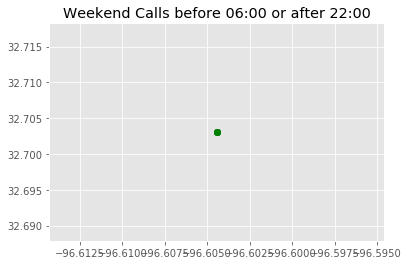

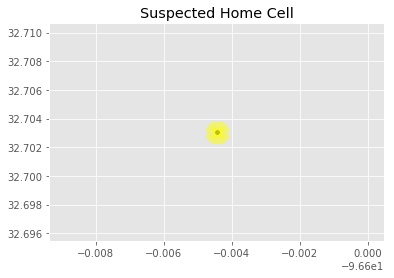

------------------------------------------------------------------------------------
phone number = 2894365987
Suspected Home Cell Co-odinates [[-96.81476225  32.77267817]]


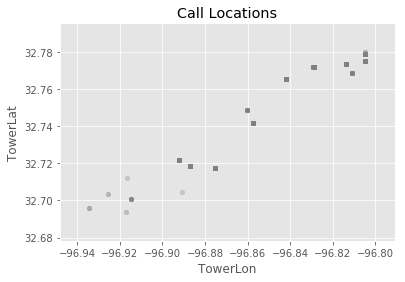

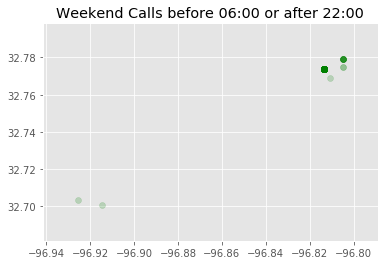

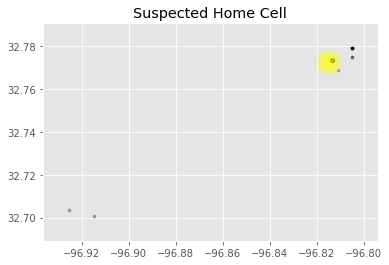

------------------------------------------------------------------------------------
phone number = 8549533077
Suspected Home Cell Co-odinates [[-96.78028103  32.77609108]]


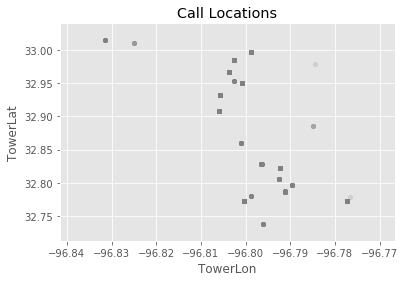

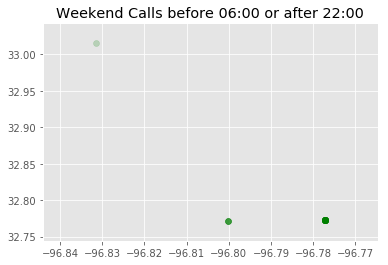

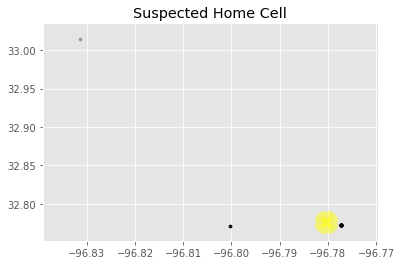

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  #exit()
    
# Load up the dataset and convert the date to_datetime, and the time to_timedelta
df = pd.read_csv('/home/chris/Documents/python_course/Module5/Datasets/CDR.csv')

# print df.dtypes
# print df.head()

df['CallDate'] = pd.to_datetime(df['CallDate'])
df['CallTime'] = pd.to_timedelta(df['CallTime'])
df['Duration'] = pd.to_timedelta(df['Duration'])

#print df.dtypes
#df.head()

#Get a distinct list of "In" phone numbers (users) and store the values in a regular python list.

a = df.In.unique()
a.tolist
print a[0]

#print 'The full list of 10 is', a

# Create a slice called user1 that filters to only include dataset records where the "In" feature is equal to the first number on your unique list above

user1 = df[df.In== a[0]]
# print user1

# Plot all the call locations
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
#showandtell()  # Comment this line out when you're ready to proceed

#user1 = df[(df.In== a[0]) & ((df.DOW=='Sat') | (df.DOW=='Sun'))]
#print user1

# filter it down for calls that are came in either before 6am OR after 10pm.

user1 = user1[((user1.DOW=='Sat') | (user1.DOW=='Sun')) & ((user1.CallTime < '06:00:00') | (user1.CallTime > '22:00:00'))]
#print 'user1 shape is for weekend calls', user1.shape

# Visualize the dataframe with a scatter plot. 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (< 06:00 or > 22:00)')
#showandtell()  # TODO: Comment this line out when you're ready to proceed

# Run K-Means with a K=1. Be sure to only feed in Lat and Lon coordinates to the KMeans algo, 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon, user1.TowerLat, marker='.', c='black', alpha=0.3)
#Filter df on Longitude and Latitude,
df2 = user1[['TowerLon','TowerLat']]

model = KMeans(n_clusters=1)
model.fit(df2)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,verbose=0)

labels = model.predict(df2)
centroids = model.cluster_centers_

#Print and plot the centroids...
centroids = model.cluster_centers_
ax.scatter(centroids[:,0], centroids[:,1], marker='X', c='yellow', alpha=0.5, linewidths=10, s=169)
print 'Suspected Home Cell Co-odinates', centroids

showandtell()  #Comment this line out when you're ready to proceed

#
# TODO: Repeat the above steps for all 10 individuals, being sure to record their approximate home
# locations. You might want to use a for-loop, unless you enjoy typing.
#
# .. your code here ..

for row in range(len(a)):
    user1 = df[df.In == a[(row)]]
    print '------------------------------------------------------------------------------------'
    print 'phone number =', a[row]
    user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
    user1 = user1[((user1.DOW=='Sat') | (user1.DOW=='Sun')) & ((user1.CallTime < '06:00:00') | (user1.CallTime > '22:00:00'))]
    
    i = str(a[row])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title ('Weekend Calls before 06:00 or after 22:00')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon, user1.TowerLat, marker='.', c='black', alpha=0.3)
    #Filter df on Longitude and Latitude,
    df2 = user1[['TowerLon','TowerLat']]

    model = KMeans(n_clusters=1)
    model.fit(df2)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,verbose=0)

    labels = model.predict(df2)
    centroids = model.cluster_centers_

    #Print and plot the centroids...
    centroids = model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='X', c='yellow', alpha=0.5, linewidths=10, s=169)
    ax.set_title ('Suspected Home Cell')
    print 'Suspected Home Cell Co-odinates', centroids

    showandtell()  #Comment this line out when you're ready to proceed